# Business Problem: 
One of the global banks would like to understand what factors driving credit card spend are. The bank want use these insights to calculate credit limit. In order to solve the problem, the bank conducted survey of 5000 customers and collected data. The objective of this case study is to understand what's driving the total spend (Primary Card + Secondary card). Given the factors, predict credit limit for the new applicants 

Data Availability: 
•	Data for the case are available in xlsx format.
•	The data have been provided for 5000 customers. 
•	Detailed data dictionary has been provided for understanding the data in the data. 
•	Data is encoded in the numerical format to reduce the size of the data however some of the variables are categorical. You can find the details in the data dictionary


In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
credit_card=pd.read_excel('C:/Users/Dell/Downloads/Data_Set.xlsx')
credit_card.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [4]:
credit_card.shape

(5000, 130)

In [5]:
credit_card.describe().T

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.0,2.0,3.0,4.0,5.0
townsize,4998.0,2.687275,1.425925,1.0,1.0,3.0,4.0,5.0
gender,5000.0,0.503600,0.500037,0.0,0.0,1.0,1.0,1.0
age,5000.0,47.025600,17.770338,18.0,31.0,47.0,62.0,79.0
agecat,5000.0,4.238800,1.308785,2.0,3.0,4.0,5.0,6.0
...,...,...,...,...,...,...,...,...
ownfax,5000.0,0.178800,0.383223,0.0,0.0,0.0,0.0,1.0
news,5000.0,0.472600,0.499299,0.0,0.0,0.0,1.0,1.0
response_01,5000.0,0.083600,0.276815,0.0,0.0,0.0,0.0,1.0
response_02,5000.0,0.129800,0.336117,0.0,0.0,0.0,0.0,1.0


In [6]:
credit_card.describe(include='object')

,custid,birthmonth
count,5000,5000
unique,5000,12
top,1414-UQOKXB-QKW,September
freq,1,458


# Data preprocessing

# Missing_Treatment

In [7]:
for x in['region','townsize','gender','agecat','edcat','jobcat','union','employ','empcat','retire','inccat','default',
'jobsat','marital','spousedcat','homeown','hometype','address','addresscat','cars','carown','cartype','carcatvalue',
'carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle','commutecarpool','commutebus',
'commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute','reason','polview','polparty',
'polcontrib','vote','card','cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat','card2','card2type',
'card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree','equip','callcard',
'wireless','multline','voice','pager','internet','callid','callwait','forward','confer','ebill','owntv','ownvcr',
'owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news','response_01','response_02','response_03']:
    credit_card[x] = credit_card[x].astype('object')

In [8]:
credit_card.isnull().sum().sort_values(ascending=False)

lnwiremon      3656
lnwireten      3656
lnequipmon     3296
lnequipten     3296
lntollten      2622
               ... 
cars              0
addresscat        0
address           0
hometype          0
response_03       0
Length: 130, dtype: int64

In [9]:
credit_card=credit_card.drop(columns=['lnwireten','lnwiremon','lntollten','lntollmon','lnequipten','lnequipmon',
                                      'lncardten','lncardmon' ])

In [10]:
credit_card.isnull().sum().sort_values(ascending=False)

longten           3
lnlongten         3
townsize          2
commutetime       2
cardten           2
                 ..
address           0
hometype          0
homeown           0
pets_freshfish    0
response_03       0
Length: 122, dtype: int64

In [11]:
credit_card =credit_card.dropna(axis=0)
credit_card.isnull().sum()

custid         0
region         0
townsize       0
gender         0
age            0
              ..
ownfax         0
news           0
response_01    0
response_02    0
response_03    0
Length: 122, dtype: int64

In [12]:
credit_card.shape

(4994, 122)

# Dropping irrelevent data

##droping the duplicate variablesand irrelenant

In [13]:
credit_card=credit_card.drop(columns=['agecat', 'edcat','lninc','inccat','lncreddebt','lnothdebt','spoused','longmon', 
            'longten','lnlongmon','lnlongten','custid', 'equipmon','empcat','spousedcat','birthmonth',
            'address','cardtenure','card2tenure','bfast','news','hourstv'])

In [14]:
credit_card['total_spend']=credit_card.cardspent + credit_card.card2spent

In [15]:
credit_card= credit_card.drop(columns = ['cardspent', 'card2spent'])

<AxesSubplot:xlabel='total_spend', ylabel='Density'>

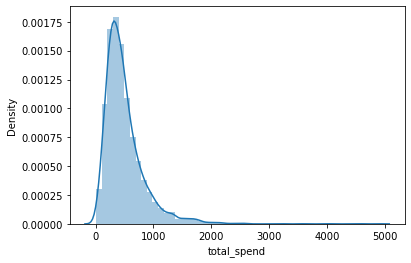

In [16]:
## To check the normality, we have to plot the dsitance plot which will give histogram
sns.distplot(credit_card.total_spend)

<AxesSubplot:xlabel='total_spent_ln', ylabel='Density'>

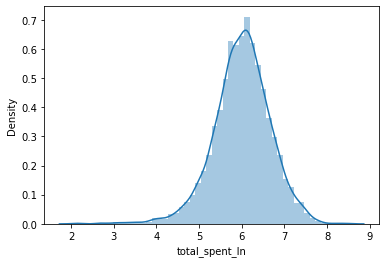

In [17]:
#it is highly skewed, log can take care of it to some extentent
credit_card['total_spent_ln']=np.log(credit_card['total_spend'])
sns.distplot(credit_card.total_spent_ln)

In [18]:
credit_card= credit_card.drop(columns = ['total_spend'])

# Outlier

In [19]:
num_vars=credit_card.select_dtypes(['int64','float64'])
cat_vars=credit_card.select_dtypes(['object'])

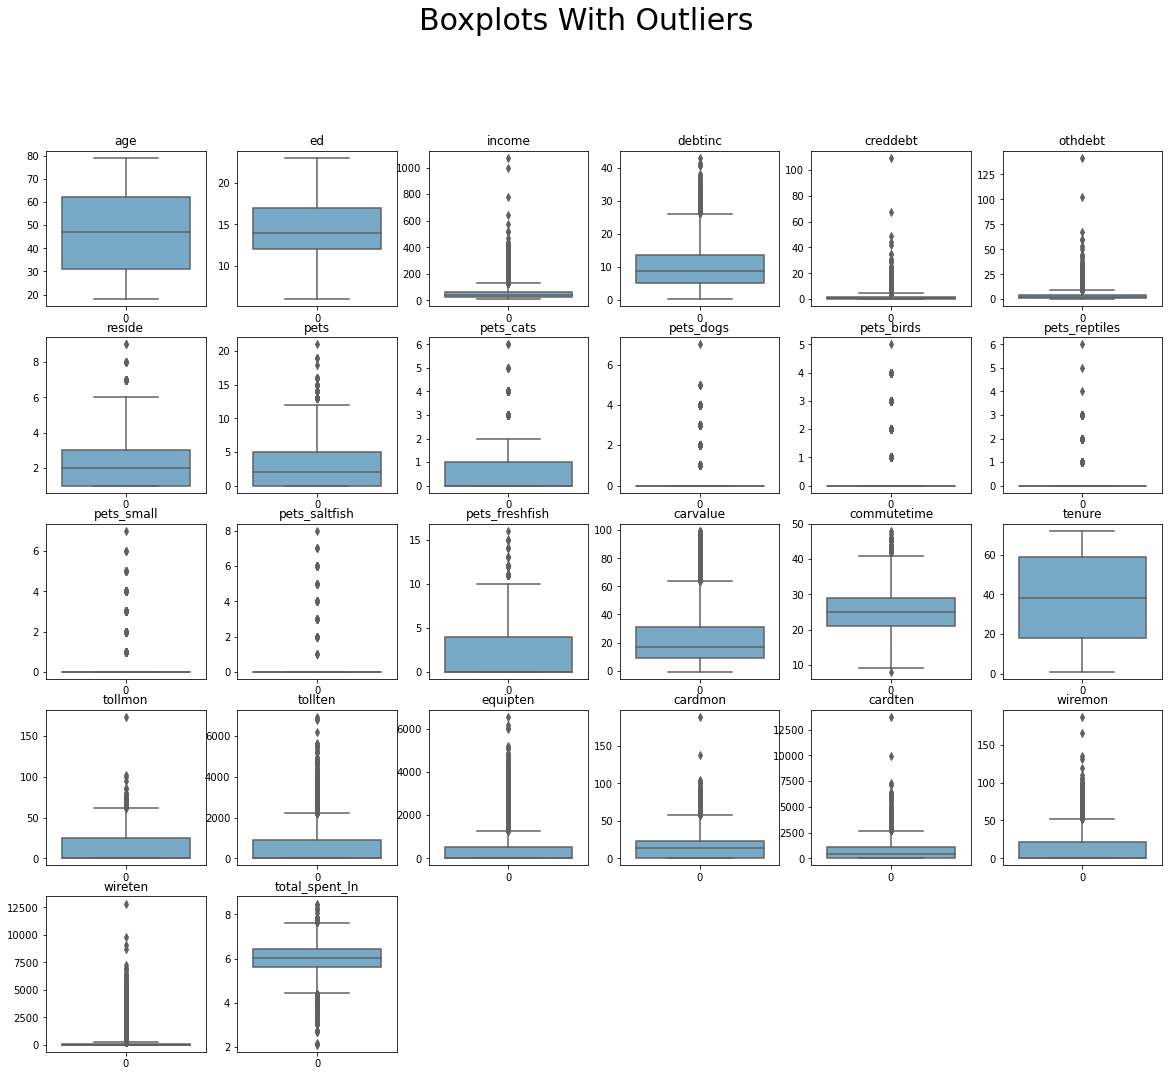

In [20]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(num_vars):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(data=num_vars[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots With Outliers', size=30)
plt.show()

In [21]:
vars_not_to_treat=num_vars[['pets', 'pets_cats','pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish','pets_freshfish',]]
#vars_not_to_treat.head()

In [24]:
var_to_treat=num_vars[['age', 'ed', 'income', 'debtinc', 'creddebt', 'othdebt', 'reside','carvalue',
       'commutetime', 'tenure', 'tollmon', 'tollten', 'equipten', 'cardmon',
       'cardten', 'wiremon', 'wireten', 'total_spent_ln']]

In [25]:
for col in var_to_treat.columns:
    percentiles = var_to_treat[col].quantile([0.1, 0.90]).values
    var_to_treat[col] = np.clip(var_to_treat[col], percentiles[0], percentiles[1])

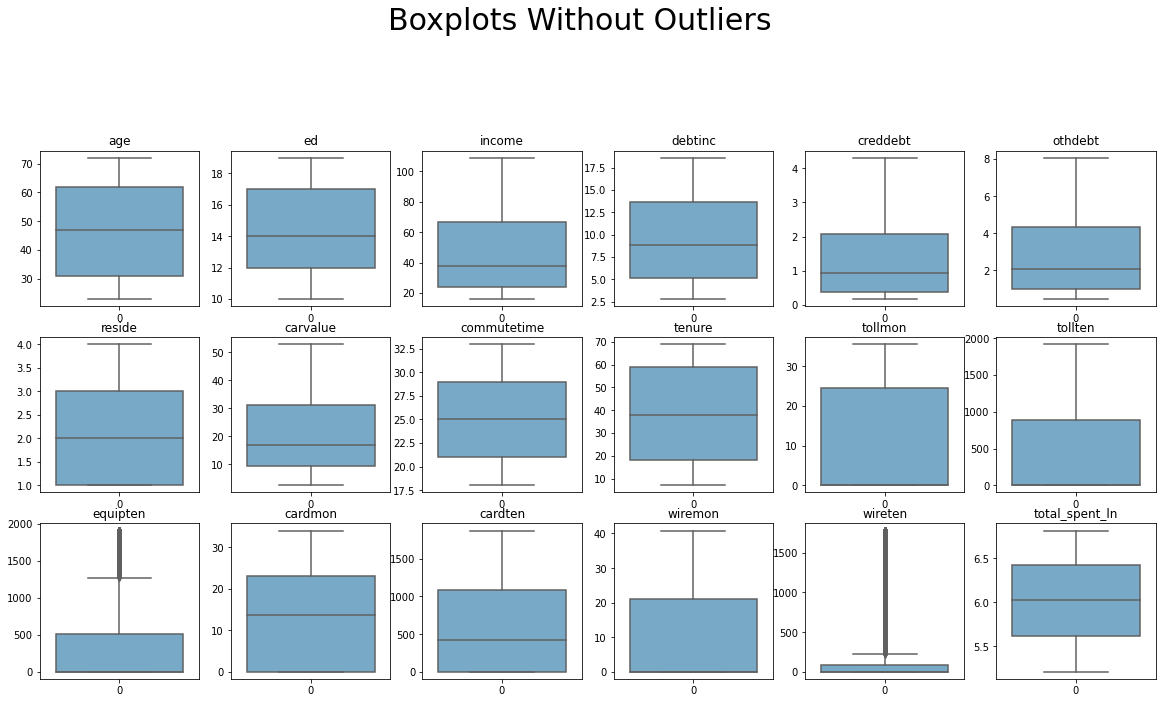

In [26]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(var_to_treat):
    plt.subplot(6, 6, i + 1)
    sns.boxplot(data=var_to_treat[column], palette='Blues')
    plt.title(column)

plt.suptitle('Boxplots Without Outliers', size=30)
plt.show()

# correlation¶

In [27]:
cat_vars.shape

(4994, 73)

In [28]:
cat_vars= cat_vars.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [29]:
final_data=pd.concat([cat_vars,vars_not_to_treat,var_to_treat],axis=1)
final_data.head()

,region,townsize,gender,jobcat,union,employ,retire,default,jobsat,marital,...,commutetime,tenure,tollmon,tollten,equipten,cardmon,cardten,wiremon,wireten,total_spent_ln
0,1,2.0,1,1,1,0,0,1,1,0,...,22.0,7,29.0,161.05,126.10,14.25,60.0,0.00,0.00,5.214561
1,5,5.0,0,2,0,0,0,1,1,0,...,29.0,39,0.0,0.00,1911.33,16.00,610.0,40.85,1683.55,5.214561
2,3,4.0,1,2,0,16,0,0,4,1,...,24.0,65,0.0,0.00,0.00,23.00,1410.0,0.00,0.00,5.886021
3,4,3.0,0,2,0,0,0,1,2,1,...,33.0,36,0.0,0.00,0.00,21.00,685.0,0.00,0.00,5.884464
4,2,2.0,0,2,0,1,0,0,1,1,...,32.0,21,16.5,387.70,0.00,17.25,360.0,19.05,410.80,6.230147


In [30]:
# Create correlation matrix
corr_matrix = final_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]

In [31]:
to_drop

['carcatvalue',
 'commutecat',
 'commutecar',
 'cardtenurecat',
 'card2tenurecat',
 'voice',
 'pager',
 'callid',
 'callwait',
 'forward',
 'confer',
 'ownpc',
 'pets_freshfish',
 'age',
 'income',
 'othdebt',
 'reside',
 'carvalue',
 'tenure',
 'tollmon',
 'tollten',
 'equipten',
 'cardmon',
 'cardten',
 'wiremon',
 'wireten']

In [32]:
final_data.drop(to_drop, axis=1, inplace=True)
final_data.shape

(4994, 73)

# Variable reduction using Variance Inflation Factor

In [33]:
X =final_data.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
50,owntv,62.960945
68,ed,36.233580
71,commutetime,33.228265
53,owncd,23.053708
51,ownvcr,18.568962
...,...,...
19,commutemotorcycle,1.125672
66,pets_small,1.101582
64,pets_birds,1.086875
65,pets_reptiles,1.059082


In [34]:
#droping varibale having vif>5 (drop varibale one by one)
final_data= final_data.drop(columns = ['owntv','ed','commutetime','owncd','ownvcr','addresscat','owndvd','polview'
                                      ,'reason','jobsat','townsize','debtinc','card2','cars','card'])

In [67]:
final_data= final_data.drop(columns = ['card2benefit','card2type','cardbenefit','cardtype','region'])

In [68]:
X =final_data.iloc[:,:-1]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
3,employ,4.696229
32,callcard,4.465356
8,hometype,4.286941
1,jobcat,4.138865
9,carown,3.927856
35,internet,3.380240
31,equip,2.991926
51,creddebt,2.916615
36,ebill,2.809480
33,wireless,2.789936


# Variable Transformation

In [69]:
def linear_relationship(x, y):
    cor_x = np.corrcoef(y, x)[1][[0]][0]
    cor_log_x = np.corrcoef(y, np.log(x+1))[1][[0]][0]
    cor_exp_x =  np.corrcoef(y, np.exp(x))[1][[0]][0]
    cor_sqrt_x =  np.corrcoef(y,np.sqrt(x))[1][[0]][0]
    cor_sqre_x =  np.corrcoef(y,x*x)[1][[0]][0]
    return pd.Series([cor_x, cor_log_x, cor_exp_x, cor_sqrt_x, cor_sqre_x], index = ['corr_x', 'corr_logx', 'corr_expx',
                                                                                     'corr_sqrtx', 'corr_sqrex'])

In [70]:
linear_relationship = final_data.apply(lambda x: linear_relationship(x,final_data.total_spent_ln))
linear_relationship.to_csv('linear_relationship.csv')

In [71]:
linear_relationship.T

,corr_x,corr_logx,corr_expx,corr_sqrtx,corr_sqrex
gender,-0.073920,-0.073920,-0.073920,-0.073920,-0.073920
jobcat,-0.003471,-0.010715,0.003225,-0.008594,0.002228
union,0.020221,0.020221,0.020221,0.020221,0.020221
employ,0.077176,0.097552,0.022524,0.092652,0.049085
retire,-0.186238,-0.186238,-0.186238,-0.186238,-0.186238
default,0.009351,0.009351,0.009351,0.009351,0.009351
marital,0.021236,0.021236,0.021236,0.021236,0.021236
homeown,0.065747,0.065747,0.065747,0.065747,0.065747
hometype,-0.016447,-0.021557,-0.005066,-0.020398,-0.009303
carown,0.070297,NaN,0.096628,NaN,0.152169


In [75]:
var_not_trans=final_data[final_data.columns.difference(['employ',
        'jobcat','hometype','carbought','pets','pets_birds','pets_small','pets_saltfish',
         'creddebt',
        'carown','cartype','commute','pets_cats','carbought'])]
var_not_trans.head()

,active,callcard,carbuy,card2fee,cardfee,churn,commutebike,commutebus,commutecarpool,commutemotorcycle,...,response_01,response_02,response_03,retire,telecommute,tollfree,total_spent_ln,union,vote,wireless
0,0,1,0,0,0,1,0,0,1,1,...,0,1,0,0,0,1,5.214561,1,1,0
1,1,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,5.214561,0,0,1
2,0,1,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,5.886021,0,0,0
3,1,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,5.884464,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,6.230147,0,0,1


In [76]:
var_log_trans=pd.DataFrame()
var_log_trans['log_employ']=np.log(final_data['employ']+1)
var_log_trans.head()

,log_employ
0,0.000000
1,0.000000
2,2.833213
3,0.000000
4,0.693147


In [77]:
#Exponential Transformation :-'jobcat','hometype','carbought','pets','pets_birds','pets_small','pets_saltfish'
var_exp_trans=pd.DataFrame()
var_exp_trans['exp_jobcat']=np.exp(final_data['jobcat'])
var_exp_trans['exp_hometype']=np.exp(final_data['hometype'])
var_exp_trans['exp_carbought']=np.exp(final_data['carbought'])

var_exp_trans['exp_pets']=np.exp(final_data['pets'])
var_exp_trans['exp_pets_birds']=np.exp(final_data['pets_birds'])
var_exp_trans['exp_pets_small']=np.exp(final_data['pets_small'])
var_exp_trans['exp_pets_saltfish']=np.exp(final_data['pets_saltfish'])
var_exp_trans.head()

,exp_jobcat,exp_hometype,exp_carbought,exp_pets,exp_pets_birds,exp_pets_small,exp_pets_saltfish
0,2.718282,7.389056,1.0,1.000000,1.0,1.0,1.0
1,7.389056,20.085537,1.0,403.428793,1.0,1.0,1.0
2,7.389056,2.718282,1.0,20.085537,1.0,1.0,1.0
3,7.389056,20.085537,1.0,1.000000,1.0,1.0,1.0
4,7.389056,7.389056,1.0,1.000000,1.0,1.0,1.0


In [78]:
#Square Root Transformation:-  'creddebt',
#Square Transformation:-         'carown','cartype','commute','pets_cats'

var_sqr_sqr_root_trans=pd.DataFrame()
var_sqr_sqr_root_trans['sqrt_creddebt']=np.sqrt(final_data['creddebt'])


var_sqr_sqr_root_trans['sqrt_carown']=np.square(final_data['carown'])
var_sqr_sqr_root_trans['sqrt_cartype']=np.square(final_data['cartype'])
var_sqr_sqr_root_trans['sqrt_carbought']=np.square(final_data['carbought'])
var_sqr_sqr_root_trans['sqrt_commute']=np.square(final_data['commute'])
var_sqr_sqr_root_trans['sqrt_pets_cats']=np.square(final_data['pets_cats'])
var_sqr_sqr_root_trans.head()

,sqrt_creddebt,sqrt_carown,sqrt_cartype,sqrt_carbought,sqrt_commute,sqrt_pets_cats
0,1.095860,1,0,0,64,0
1,1.105450,1,1,0,1,0
2,0.963649,1,1,0,16,4
3,0.419482,1,1,0,1,0
4,0.463313,0,1,0,36,0


In [79]:
model_data=pd.concat([var_not_trans,var_log_trans,var_exp_trans,var_sqr_sqr_root_trans],axis=1)
model_data.head()

,active,callcard,carbuy,card2fee,cardfee,churn,commutebike,commutebus,commutecarpool,commutemotorcycle,...,exp_pets,exp_pets_birds,exp_pets_small,exp_pets_saltfish,sqrt_creddebt,sqrt_carown,sqrt_cartype,sqrt_carbought,sqrt_commute,sqrt_pets_cats
0,0,1,0,0,0,1,0,0,1,1,...,1.000000,1.0,1.0,1.0,1.095860,1,0,0,64,0
1,1,1,0,0,0,0,1,1,0,0,...,403.428793,1.0,1.0,1.0,1.105450,1,1,0,1,0
2,0,1,1,0,0,0,0,1,1,0,...,20.085537,1.0,1.0,1.0,0.963649,1,1,0,16,4
3,1,1,1,0,0,0,0,0,0,0,...,1.000000,1.0,1.0,1.0,0.419482,1,1,0,1,0
4,1,1,1,0,0,0,0,0,0,0,...,1.000000,1.0,1.0,1.0,0.463313,0,1,0,36,0


In [80]:
#Spliting the data into test and train
from sklearn.model_selection import train_test_split

train, test = train_test_split( model_data,test_size = 0.3,random_state = 1000)

In [81]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split( model_data,model_data['total_spent_ln'],test_size = 0.3,
                                                    random_state = 1000)

# Model:1

In [82]:
#Model building using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


param_grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 15),
    'max_features': np.arange(3,7),
    'bootstrap': [False, True]
}

tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_features': array([3, 4, 5, 6]),
                         'n_estimators': [100, 200, 300]})

In [83]:
y_train_pred = tree.predict(train_X)
y_test_pred = tree.predict(test_X)

In [84]:
# R-square on train data
from sklearn.metrics import r2_score
print('train accuracy:',r2_score(train_y ,y_train_pred))

train accuracy: 0.9829026103423796


In [85]:
# R-square on test data
print('\ntest accuracy:', r2_score(test_y, y_test_pred))


test accuracy: 0.8467091928064748


In [86]:
from sklearn import metrics
import scipy.stats as stats



RMSE_train = metrics.mean_squared_error(train_y ,y_train_pred)
print('RMSE_TRAIN:',RMSE_train)


#Test Data

RMSE_test = metrics.mean_squared_error(test_y, y_test_pred)
print('RMSE_TEST :',RMSE_test)

RMSE_TRAIN: 0.0044642459192076175
RMSE_TEST : 0.03806170838285269


In [87]:
tree.best_params_

{'bootstrap': False, 'max_depth': 14, 'max_features': 6, 'n_estimators': 100}

In [88]:
Final_tree = RandomForestRegressor(bootstrap=False,max_depth=15,max_features=6,n_estimators=300, random_state=0)  
Final_tree.fit(train_X, train_y)

RandomForestRegressor(bootstrap=False, max_depth=15, max_features=6,
                      n_estimators=300, random_state=0)

In [89]:
#But as we have to take top 15 variables

top_15_var=pd.DataFrame({'feature':model_data.columns, 'importance':Final_tree.feature_importances_})
top_15_var=top_15_var.sort_values(by='importance', ascending=False)
top_15_var
#here log_Total_Spend is intercept

,feature,importance
36,total_spent_ln,0.646858
48,sqrt_creddebt,0.047332
40,log_employ,0.028248
44,exp_pets,0.016600
33,retire,0.016484
41,exp_jobcat,0.012228
52,sqrt_commute,0.010873
19,internet,0.010793
49,sqrt_carown,0.009617
42,exp_hometype,0.009184


# Model:2

In [91]:
# So, Important variables in descending order are:- 'sqrt_creddebt','log_employ','exp_pets','retire','exp_jobcat','sqrt_commute',
#'internet','sqrt_carown','exp_hometype','sqrt_pets_cats','pets_dogs','exp_carbought','gender','sqrt_cartype' ,'marital'

final_model_data=model_data.loc[:,['sqrt_creddebt','log_employ','exp_pets','retire','exp_jobcat','sqrt_commute',
'internet','sqrt_carown','exp_hometype','sqrt_pets_cats','pets_dogs','exp_carbought','gender','sqrt_cartype' ,'marital',
                                   'total_spent_ln']]
final_model_data.head()

,sqrt_creddebt,log_employ,exp_pets,retire,exp_jobcat,sqrt_commute,internet,sqrt_carown,exp_hometype,sqrt_pets_cats,pets_dogs,exp_carbought,gender,sqrt_cartype,marital,total_spent_ln
0,1.095860,0.000000,1.000000,0,2.718282,64,0,1,7.389056,0,0,1.0,1,0,0,5.214561
1,1.105450,0.000000,403.428793,0,7.389056,1,4,1,20.085537,0,0,1.0,0,1,0,5.214561
2,0.963649,2.833213,20.085537,0,7.389056,16,0,1,2.718282,4,1,1.0,1,1,1,5.886021
3,0.419482,0.000000,1.000000,0,7.389056,1,2,1,20.085537,0,0,1.0,0,1,1,5.884464
4,0.463313,0.693147,1.000000,0,7.389056,36,3,0,7.389056,0,0,1.0,0,1,1,6.230147


In [92]:
train_X, test_X, train_y, test_y = train_test_split( final_model_data,
                                                  final_model_data['total_spent_ln'],
                                                  test_size = 0.3,
                                                  random_state = 1000 )
train_X.shape

(3495, 16)

In [93]:
train, test = train_test_split( final_model_data,test_size = 0.3,random_state = 1000)

In [94]:
param_grid = { 
    'n_estimators': [100,200,300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': np.arange(3, 16),
    'max_features': np.arange(3,7),
    'bootstrap': [False, True],
    'n_jobs':[-1]
}

tree = GridSearchCV(RandomForestRegressor(), param_grid, cv = 10)
tree.fit(train_X, train_y)


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [False, True],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'max_features': array([3, 4, 5, 6]),
                         'n_estimators': [100, 200, 300], 'n_jobs': [-1]})

In [95]:
y_train_pred = tree.predict(train_X)
y_test_pred = tree.predict(test_X)

In [102]:
# R-square on train data
from sklearn.metrics import r2_score
print('r2_train:',r2_score(train_y ,y_train_pred))

# R-square on test data
print('r2_test:',r2_score(test_y, y_test_pred))

r2_train: 0.9999821105104679
r2_test: 0.9977227693738967


In [103]:
from sklearn import metrics
import scipy.stats as stats



RMSE_train = metrics.mean_squared_error(train_y ,y_train_pred)
print('RMSE_TRAIN:',RMSE_train)


#Test Data

RMSE_test = metrics.mean_squared_error(test_y, y_test_pred)
print('RMSE_TEST :',RMSE_test)

RMSE_TRAIN: 4.671068639102294e-06
RMSE_TEST : 0.0005654304364241433
